In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
## Checking the shape the dataset
df.shape

(200, 5)

In [5]:
## Checking datatype of dataset
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [9]:
## Checking info for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Checking null values

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Dropping The columns:

In [12]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
df_new=df

In [14]:
df_new.shape

(200, 5)

In [15]:
df_new=df.drop('Unnamed: 0', axis=1)

In [16]:
df_new.shape

(200, 4)

<AxesSubplot:>

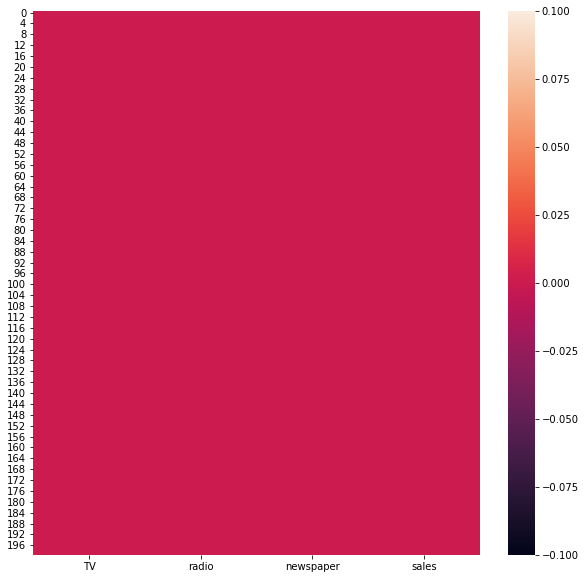

In [19]:
plt.figure(figsize=[10,10])
sns.heatmap(df_new.isnull())

No null value present in our dataset.

# Statistical Description of Dataset

In [20]:
## statistical Summary
df_new.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observation

1- Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

2-There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

3- Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

# Correlation

In [21]:
df_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap'}>

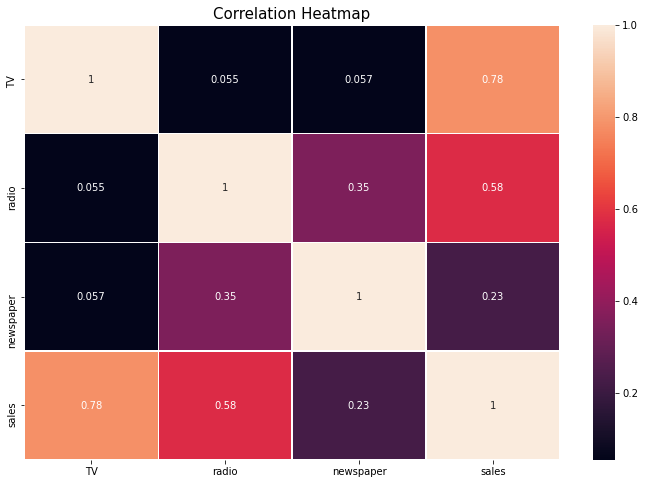

In [23]:
## Correlation Plot
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df_new.corr(),annot=True,linewidths=.2)

In [24]:
## Correlation with target attribute
df_new.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Observation:-

1- TV and radio has a strong and positive correlation with targer attribute.

2-Newspaper and radio are correlated to each other.

<AxesSubplot:title={'center':'Coreelation with Target'}>

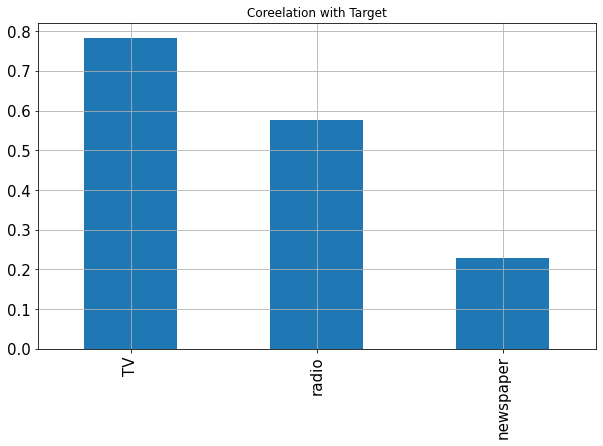

In [25]:
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)

observation:

1- TV, Radio have correlation more that 50% with target variable.

# Data Analysis and Visualization

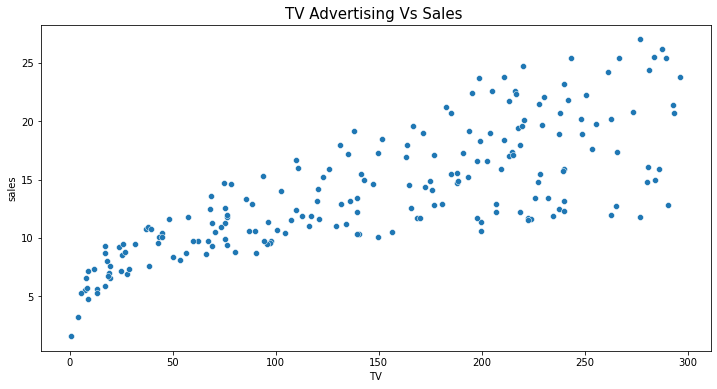

In [30]:
plt.figure(figsize=(12,6))
plt.title('TV Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df_new['TV'],df_new['sales'],data=df_new)
plt.show()

Observation

1- There is a linear positive correlation between TV advertising and Sales.

2- As Tv advertising inceases sales also increases.

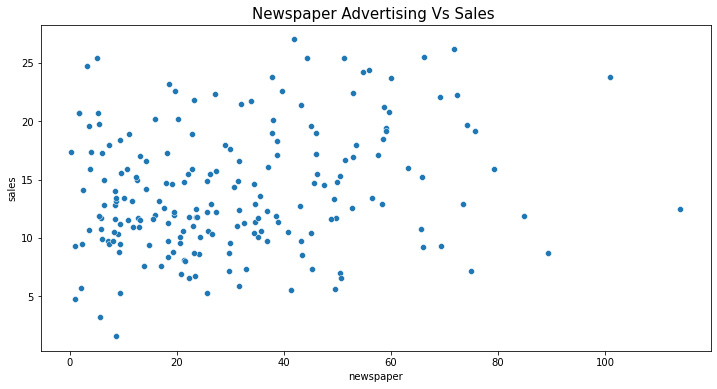

In [31]:
plt.figure(figsize=(12,6))
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df_new['newspaper'],df_new['sales'],data=df_new)
plt.show()

Observation

1- from above scatter plot we can see that there is a moderate realtionship with sales.

2- Datapoints are scattered we can't conclude from this plot

3-Some points are widly scattered.

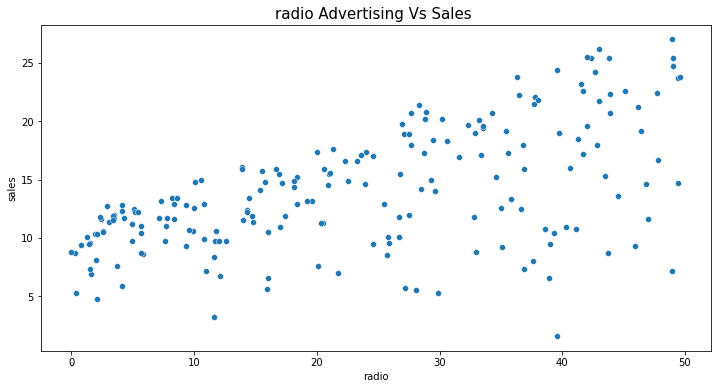

In [32]:
plt.figure(figsize=(12,6))
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df_new['radio'],df_new['sales'],data=df_new)
plt.show()

Observation

1- This plot shows a positive linear relation between radio advertising and sales.

2- As radio advertising increases, sales also get increases.

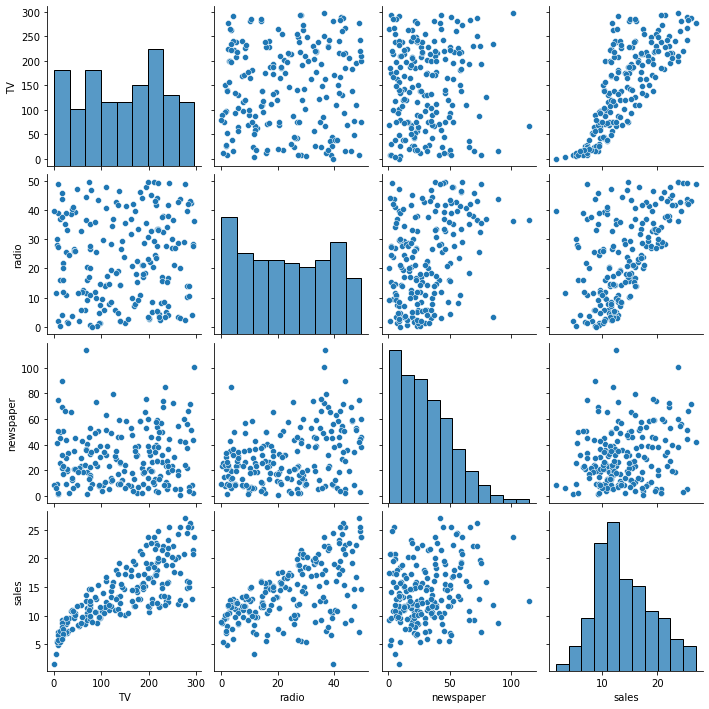

In [33]:
## Let's plot the pairplot for all the attributes together
sns.pairplot(df_new)

# Distribution:

In [35]:
collist=df_new.columns.values
collist

array(['TV', 'radio', 'newspaper', 'sales'], dtype=object)

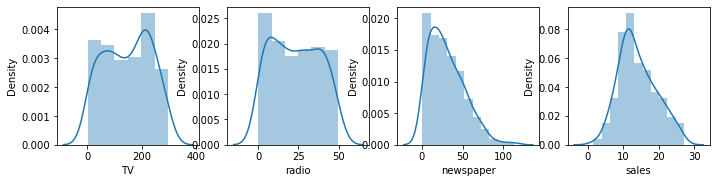

In [36]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_new[collist[i]])

Observation

1- It shows that our dataset is approimately bell shaped in distribution means normally distributed.

2- Newspaper attribute is a little right skewed.

3- our target attribute is Normally distributed.

# Checking Outliers:

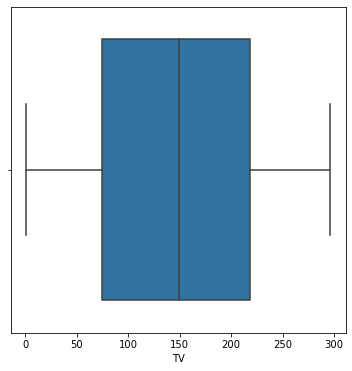

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(df_new['TV'])
plt.show()

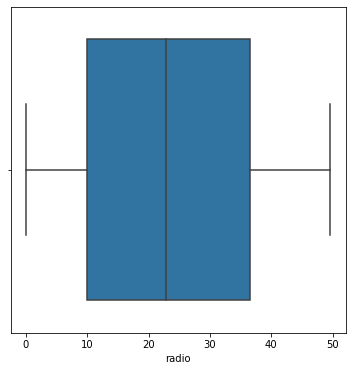

In [40]:
plt.figure(figsize=(6,6))
sns.boxplot(df_new['radio'])
plt.show()

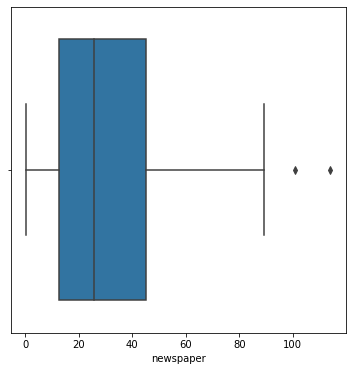

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(df_new['newspaper'])
plt.show()

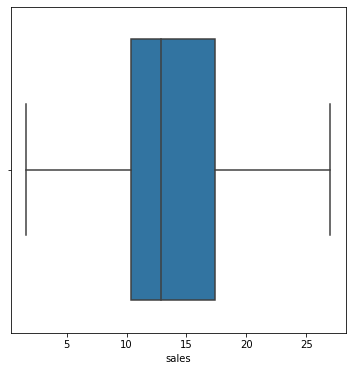

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot(df_new['sales'])
plt.show()

# handling Outliers:

In [55]:
def outlier_normally(df_new,col):
    lower_boundary=df_new[col].mean()-3*df_new[col].std()
    upper_boundary=df_new[col].mean()+3*df_new[col].std()
    print(lower_boundary,upper_boundary)
    df_new[col]=np.where((df_new[col]<lower_boundary)|(df_new[col]>upper_boundary),df_new[col].median(),df_new[col])
    sns.boxplot(df_new[col])

-34.7818625155685 95.8898625155685


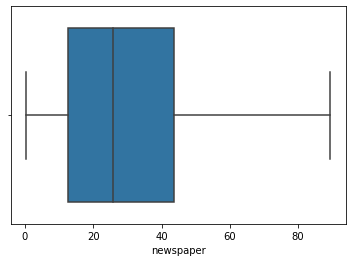

In [56]:
outlier_normally(df_new,'newspaper')

we have replaced the outliers with median , now there is no outliers present in our dataset.

We can see that our dataset has no outliers present.

# Skewness:

In [57]:
df_new.skew()

TV          -0.069853
radio        0.094175
newspaper    0.658874
sales        0.407571
dtype: float64

We can see that for Newspaper attribute skewness is more than .5 so we will remove this with some transformation methods.

In [59]:
df_new['newspaper']=np.sqrt(df_new['newspaper'])

In [60]:
df_new.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.040656
sales        0.407571
dtype: float64

Now we can see that skewness is completly removed from our dataset.

# Splitting data into Input and Output Variable

In [61]:
x=df.drop(['Unnamed: 0','sales'],axis=1)
y=df[['sales']]

In [62]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [63]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# Scaling DataSet:

In [64]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,TV,radio,newspaper
0,0.969852,0.981522,1.563095
1,-1.197376,1.082808,0.774855
2,-1.516155,1.528463,1.566049
3,0.052050,1.217855,1.233576
4,0.394182,-0.841614,1.230360
...,...,...,...
195,-1.270941,-1.321031,-0.700730
196,-0.617035,-1.240003,-1.127935
197,0.349810,-0.942899,-1.283433
198,1.594565,1.265121,1.473445


# Feature Importance

In [68]:
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [74]:
print(extra.feature_importances_)

[0.62260359 0.36998525 0.00741116]


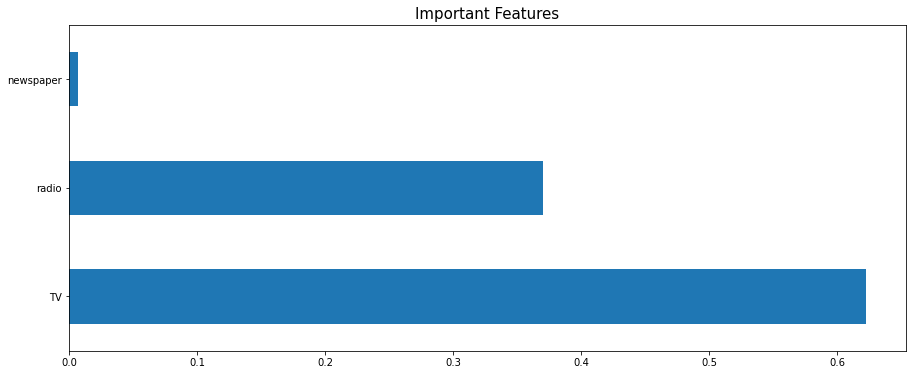

In [75]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

we can see that radio and TV are highly important features for our target column to predict the right sales price.

# Model Building

In [84]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [96]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('Training accuracy',clf.score(x_train,y_train))
    print('Test Accuracy',clf.score(x_test,y_test))
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

# LinearRegression

In [97]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 92 is 0.9514095674628554
cross validation score 0.8873331295445761
Standard Deviation 0.039906735613166856
Training accuracy 0.8908046377834327
Test Accuracy 0.9189321197091166
MAE 1.1591806007349394
MSE 2.078102150164535
RMSE 1.4415623989840103


92

# Lasso Regression:

In [98]:
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 83 is 0.8616707145490253
cross validation score 0.8175135660884789
Standard Deviation 0.04816955790793658
Training accuracy 0.8207247509119464
Test Accuracy 0.8407357569037717
MAE 1.4975447804611441
MSE 4.082595533953025
RMSE 2.0205433759147624


83

# Ridge Regression:

In [99]:
ridge=Ridge()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 0.9511069380271034
cross validation score 0.8873904144766908
Standard Deviation 0.04032441548753263
Training accuracy 0.8907728591577208
Test Accuracy 0.9186935191737393
MAE 1.163366702485645
MSE 2.08421846014845
RMSE 1.4436822573365824


92

# Decision Tree Regressor

In [100]:
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 75 is 0.974824190186631
cross validation score 0.953313123897099
Standard Deviation 0.005793825516798726
Training accuracy 1.0
Test Accuracy 0.9634861376057673
MAE 0.7099999999999997
MSE 0.9359999999999997
RMSE 0.9674709297958258


75

# KNN:

In [101]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 54 is 0.964334033458513
cross validation score 0.9370596549659117
Standard Deviation 0.02998064480963467
Training accuracy 0.9536037681339353
Test Accuracy 0.9230025629922642
MAE 0.9130000000000003
MSE 1.9737599999999993
RMSE 1.404905690784972


54

# Random Forest Regressor:

In [102]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 47 is 0.9891461834927604
cross validation score 0.9758996329171055
Standard Deviation 0.00822466191644189
Training accuracy 0.9961573601826594
Test Accuracy 0.9845415520732149
MAE 0.4752500000000028
MSE 0.3962634000000028
RMSE 0.6294945591504368


47

# Conclusion:

From above results it is clear that Random Forest Regressor is our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

RandomForestRegressor:-
                    
                    
                    1.R_2 score	:- 98.90
                    
                    
                    2.Cross_validation :- 97.59

# Hyperparameter Tuning for Random Forest Regressor:

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': 50, 'max_features': 3, 'n_estimators': 50}

Error
 Mean Absolute Error (MAE) : 0.5303115476190468
Mean Squared Error (MSE) : 0.43551054583503246
Root Mean Squared Error : 0.6599322282136496
R_2 score: 0.9847663130728349


<AxesSubplot:ylabel='sales'>

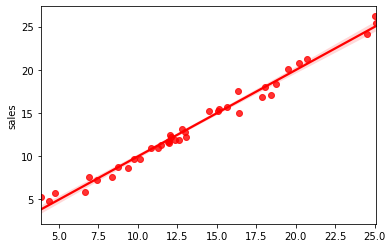

In [104]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))
## best fit line
sns.regplot(pred,y_test,color='r')

We can see that with Hyperparameter tuning our R_2 score is 98.57 which is improved hence we will save this as our best Model.

# Saving

In [108]:
import joblib
joblib.dump(forest,'Advertisementsales.pkl')

['Advertisementsales.pkl']

# Loading Model

In [111]:
loaded_model=joblib.load('Advertisementsales.pkl')
prediction=loaded_model.predict(x_test)